In [1]:
import numpy as np
from coords import x, y, t
from util import plot_curve, plot_curve2
from lagrange import lagrange, coeff

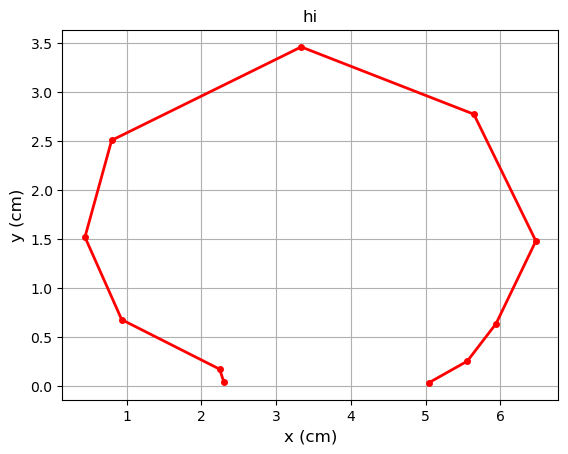

In [2]:
plot_curve(x, y, "x (cm)", "y (cm)", title="hi")

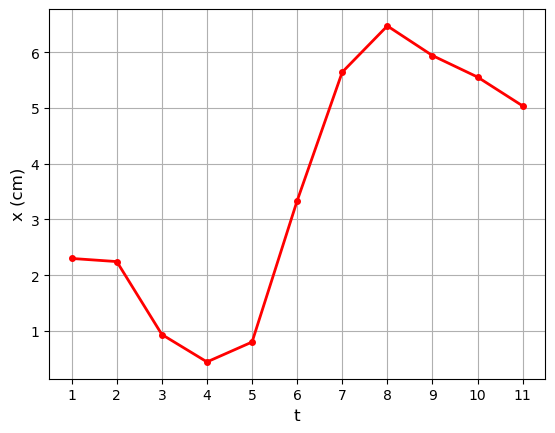

In [3]:
plot_curve(t,x,"t","x (cm)", xticks=t)

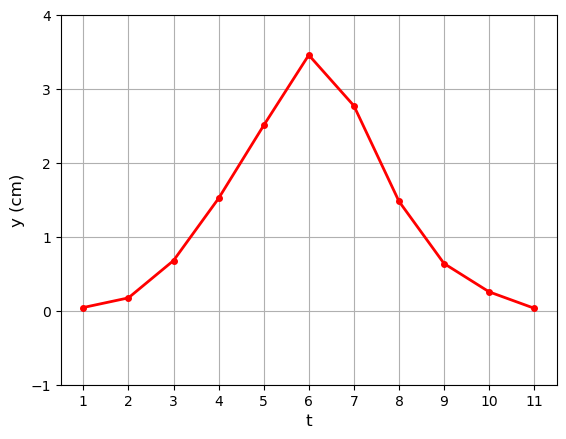

In [4]:
plot_curve(t,y,"t","y (cm)", xticks=t, ylim=[-1,4])

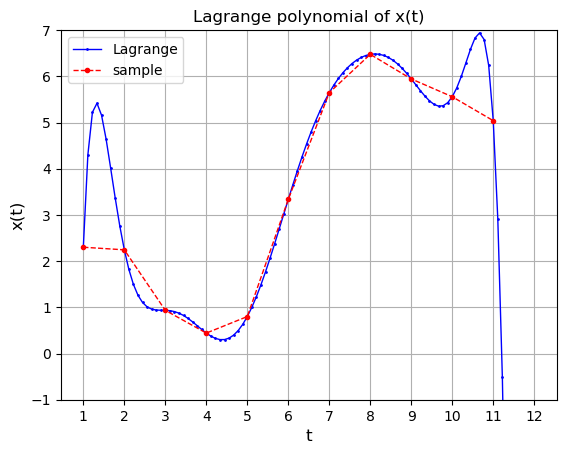

In [5]:
ts = np.linspace(1,12,100)
val_x = lagrange(t,x, ts)
plot_curve2(ts, val_x, t, x, xticks=t, xlabel="t", ylabel="x(t)", ylim=[-1,7], title="Lagrange polynomial of x(t)")

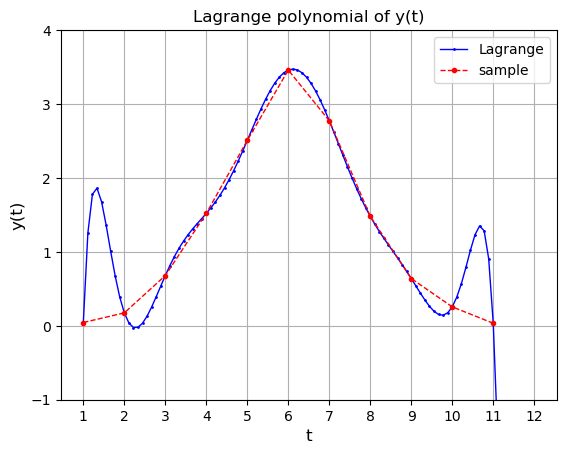

In [6]:
ts = np.linspace(1,12,100)
val_y = lagrange(t,y, ts)
plot_curve2(ts, val_y, t, y, xticks=t, xlabel="t", ylabel="y(t)", ylim=[-1,4], title="Lagrange polynomial of y(t)")

### Piecewise interpolation

In [7]:
xp = []
yp = []
tp = []
for i in range(0,len(x)-2,2):
    #print(i)
    ts = np.linspace(i+1,i+3,99)
    #print(f"ts={ts}")
    t_seg = [i+1, i+2, i+3]
    x_seg = [x[i], x[i+1], x[i+2]]
    y_seg = [y[i], y[i+1], y[i+2]]
    val_x = lagrange(t_seg,x_seg,ts)
    val_y = lagrange(t_seg,y_seg,ts)
    tp.extend(ts)
    xp.extend(val_x)
    yp.extend(val_y)

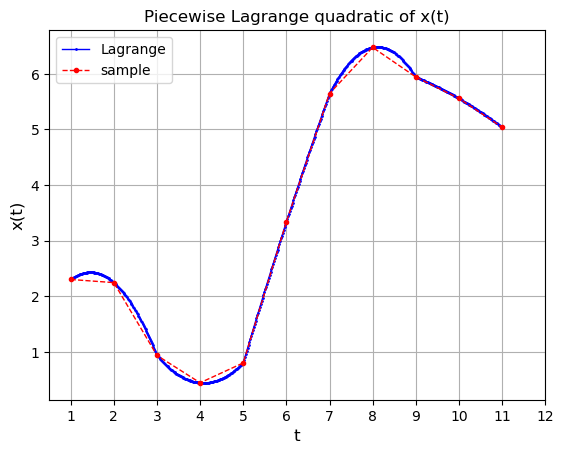

In [8]:
plot_curve2(tp, xp, t, x, xticks=t, xlabel="t", ylabel="x(t)", title="Piecewise Lagrange quadratic of x(t)")

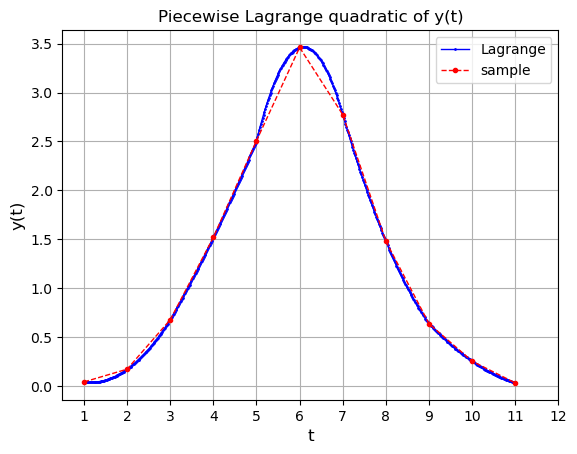

In [9]:
plot_curve2(tp, yp, t, y, xticks=t, xlabel="t", ylabel="y(t)", title="Piecewise Lagrange quadratic of y(t)")

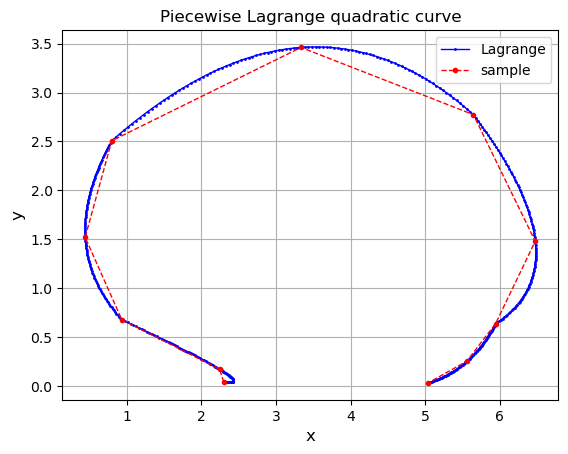

In [10]:
plot_curve2(xp, yp, x, y, xlabel="x", ylabel="y", title="Piecewise Lagrange quadratic curve")

### Coefficients

In [11]:
tc = []
xc = []
yc = []
for i in range(0,len(x)-2,2):
    print(i)
    #print(f"ts={ts}")
    t_seg = [i+1, i+2, i+3]
    x_seg = [x[i], x[i+1], x[i+2]]
    y_seg = [y[i], y[i+1], y[i+2]]
    
    tc.append((t_seg[0], t_seg[-1]))
    a,b,c  = coeff(t_seg,x_seg)
    xc.append((a,b,c))
    #rint(f"x: {a} {b} {c}")
    a, b, c = coeff(t_seg,y_seg)
    #print(f"y: {a} {b} {c}")
    yc.append((a,b,c))
               
print(tc)
print(xc)
print(yc)

0
2
4
6
8
[(1, 3), (3, 5), (5, 7), (7, 9), (9, 11)]
[(-0.6267989820892502, 1.8242806655564507, 1.1031260205759994), (0.42457692421209997, -3.4640478397961, 7.505728379921499), (-0.11345535888754998, 3.7844866433335476, -15.286136958235502), (-0.6807919534968003, 11.041649499765903, -38.28678381740872), (-0.06600539047980059, 0.868183832006622, 3.4766955880479884)]
[(0.18724857960295002, -0.43155596755865, 0.2889052122491001), (0.07244497686820006, 0.33461414392970035, -0.9763726976031997), (-0.8190334089821998, 9.961557110615498, -26.824127884772196), (0.2254409059463, -4.6744183488225985, 24.448458899798005), (0.08070947230350001, -1.9166615496200998, 11.351893832042304)]


### Volume

In [18]:
def volume_f(t, coeff_x, coeff_y ):
    """
    defines the function for a given segment we need to integrate
    to compute the volume
    """
    a,b,c = coeff_x
    A,B,C = coeff_y
    # start,end = interv
    return ((A*(t**2)+B*t+C)**2)*(2*a*t+b)


from scipy.integrate import romberg
total_vol = 0

# loop for the segments
for i in range(len(xc)):
    interv = tc[i] # the segment
    coeff_x = xc[i] # coefficients of x(t) in the segment
    coeff_y = yc[i] # coefficients of y(t) in the segment
    
    # compute integral with Romberg method
    vol = np.pi * romberg(volume_f, interv[0], interv[1], args=(coeff_x, coeff_y))
    total_vol = total_vol + vol
    print(f"segment[{i+1}]={interv} volume={vol}")

print(f"total_volume={total_vol}")

segment[1]=(1, 3) volume=-0.8775536142799132
segment[2]=(3, 5) volume=3.9577150074661653
segment[3]=(5, 7) volume=155.25487709246423
segment[4]=(7, 9) volume=12.4685829826166
segment[5]=(9, 11) volume=-0.26490598919941
total_volume=170.53871547906766


### Surface Area


In [21]:
def surface_f(t,coeff_x, coeff_y ):
    """
    defines the function for a given segment we need to integrate
    to compute the surface area
    """
    a,b,c = coeff_x
    A,B,C = coeff_y
    # start,end = interv
    return (A*(t**2)+B*t+C)*np.sqrt((2*a*t+b)**2+(2*A*t+B)**2)


from scipy.integrate import romberg
total_sa = 0

# loop for the segments
for i in range(len(xc)):
    interv = tc[i] # the segment
    coeff_x = xc[i] # coefficients of x(t) in the segment
    coeff_y = yc[i] # coefficients of y(t) in the segment
    
    # compute integral with Romberg method
    sa = 2 * np.pi * romberg(surface_f, interv[0], interv[1], args=(coeff_x, coeff_y))
    total_sa = total_sa +sa
    print(f"segment[{i+1}]={interv} surface area={sa}")
    
print(f"total surface area = {total_sa}")

segment[1]=(1, 3) surface area=4.046399602057395
segment[2]=(3, 5) surface area=20.423230468738595
segment[3]=(5, 7) surface area=103.44249019553135
segment[4]=(7, 9) surface area=27.986905788976664
segment[5]=(9, 11) surface area=1.9600979179629596
total surface area = 157.85912397326697
